**Logistic Regression** is a **machine learning method** used for **classification problems**.

✅ It answers questions like:

* Yes or No?
* True or False?
* 0 or 1?

### Simple words:

It helps the computer **decide between two or more choices**, but mostly it is used for **two choices (binary classification).**

---

### Example:

| Question                 | Answer (Output)      |
| ------------------------ | -------------------- |
| Will this email be spam? | Yes (1) or No (0)    |
| Will the student pass?   | Pass (1) or Fail (0) |
| Is this picture a cat?   | Yes (1) or No (0)    |

---

### How it works (very simple):

Instead of drawing a **straight line** like Linear Regression,
Logistic Regression draws an **S-shaped curve** to decide results between **0 and 1**.

So the output is a **probability** like:

* 0.8 → Yes (80% chance)
* 0.2 → No (20% chance)

---

### Main point:

| Linear Regression                    | Logistic Regression               |
| ------------------------------------ | --------------------------------- |
| Predicts numbers (e.g. price, marks) | Predicts categories (Yes/No, 0/1) |
| Output can be any number             | Output is between 0 and 1         |
| Draws a straight line                | Draws an "S" curve                |

---

### Easy Summary:

> **Logistic regression is used when we want to classify something into categories like Yes/No or 0/1.**

---


**main assumptions of Logistic Regression** in **very simple English**:

---

### ✅ **1. The target must be categories**

Your output should be like:

* Yes / No
* 0 / 1
* Spam / Not Spam

Not numbers like 50, 60, 90.

---

### ✅ **2. Features (inputs) should have a linear relation with the log odds**

It does **NOT need a straight line like linear regression**,
but it should have a linear relation with the **log of probability**.

(Simple words: the pattern should not be totally random.)

---

### ✅ **3. No or little multicollinearity**

Independent variables should **not be very similar to each other**.

Example (bad case ❌):

* Height in cm
* Height in meters
  (Both are same information)

---

### ✅ **4. No extreme outliers**

Very extreme values can disturb the model.

---

### ✅ **5. Large enough data is better**

Logistic regression works better when we have **many samples**.

---

### ✅ **6. Observations should be independent**

One row should not depend on another row.

Example (bad ❌):

* Same person's data repeated many times

---

### 📌 Short Summary:

| Assumption           | Meaning                |
| -------------------- | ---------------------- |
| Categorical target   | Output must be classes |
| Linear with log odds | Not random pattern     |
| No multicollinearity | Inputs not too similar |
| No strong outliers   | No extreme values      |
| Enough data          | More data = better     |
| Independent rows     | No repeated dependency |

---



In [84]:
# import  libraries
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler, LabelEncoder, MinMaxScaler 
from sklearn.model_selection import train_test_split



In [85]:
# data import 
df = sns.load_dataset('titanic')
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [86]:
# data preprocess 
# remove the 'deck' column if it exists
if 'deck' in df.columns:
    df = df.drop('deck', axis=1)

# impute the missing values in age and fare
df['age'] = df['age'].fillna(df['age'].median())
df['fare'] = df['fare'].fillna(df['fare'].median())

#impute the missing values in embarked and embark town
df['embark_town'].fillna(df['embark_town'].mode()[0], inplace=True)
df['embarked'].fillna(df['embarked'].mode()[0], inplace=True)

# encode the categorical variables using loop where object and cetagory are given
le = LabelEncoder()
for i in df.columns:
    if df[i].dtype == 'object' or df[i].dtype.name == 'category' :
        df[i] = le.fit_transform(df[i])

df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,1,22.0,1,0,7.2500,2,2,1,True,2,0,False
1,1,1,0,38.0,1,0,71.2833,0,0,2,False,0,1,False
2,1,3,0,26.0,0,0,7.9250,2,2,2,False,2,1,True
3,1,1,0,35.0,1,0,53.1000,2,0,2,False,2,1,False
4,0,3,1,35.0,0,0,8.0500,2,2,1,True,2,0,True


In [87]:
# X and y column
X = df.drop('survived', axis=1)
y = df['survived']

In [88]:
# Train test split the data
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

In [89]:
# model call
model = LinearRegression()

In [90]:
# train the model
model.fit(X_train, y_train )

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [91]:
# predict the values
y_pred = model.predict(X_test)

In [94]:
# Convert continuous predictions to 0 or 1 using threshold 0.5
y_pred_class = [1 if i >= 0.5 else 0 for i in y_pred]

print('Accuracy Score: ', accuracy_score(y_test, y_pred_class))
print('Recall Score: ', recall_score(y_test, y_pred_class))
print('Precision Score: ', precision_score(y_test, y_pred_class))


Accuracy Score:  1.0
Recall Score:  1.0
Precision Score:  1.0


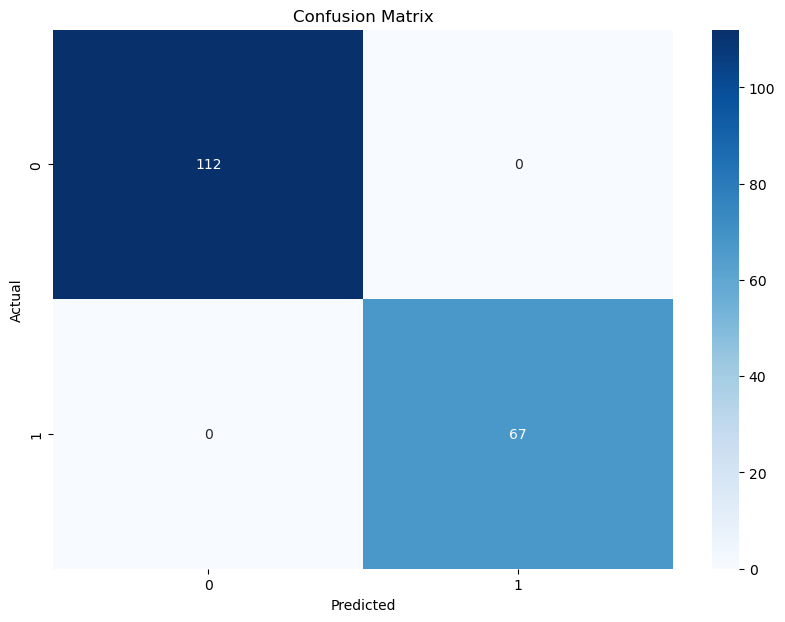

In [96]:
# plot the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(confusion_matrix(y_test, y_pred_class), annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [99]:
# save the model
import pickle
pickle.dump(model, open('./saved_model/model_logistic_regression.pk1', 'wb'))